In [1]:
import os
from glob import glob

from astropy.table import Table, vstack, join

from desispec.io import read_spectra

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rc('font', size=14)

In [3]:
redux = 'daily/tiles/cumulative'
basedir = os.environ['DESI_SPECTRO_REDUX']

tiles = ['80980', '80981']
date = '20210708'

too_targets = None

for tile in tiles:
    tilefolder = '{}/{}/{}/{}'.format(basedir, redux, tile, date)
    zbest_files = sorted(glob('{}/zbest*fits'.format(tilefolder)))
    for zbest_file in zbest_files:
        # Read the redshift fit.
        zbest = Table.read(zbest_file, 'ZBEST')
        
        # Grab the spectra from the corresponding coadd file.
        coadd_file = zbest_file.replace('zbest', 'coadd')
        spectra = read_spectra(coadd_file)
        
        # Join the fibermap and zbest tables.
        targets = join(spectra.fibermap, zbest, keys=['TARGETID'])
        
        if too_targets is None:
            too_targets = targets
        else:
            too_targets = vstack([too_targets, targets])

INFO:spectra.py:261:read_spectra: iotime 0.545 sec to read coadd-0-80980-thru20210708.fits at 2021-07-09T06:57:16.211473
INFO:spectra.py:261:read_spectra: iotime 0.501 sec to read coadd-1-80980-thru20210708.fits at 2021-07-09T06:57:17.128470
INFO:spectra.py:261:read_spectra: iotime 0.464 sec to read coadd-2-80980-thru20210708.fits at 2021-07-09T06:57:18.054832
INFO:spectra.py:261:read_spectra: iotime 0.474 sec to read coadd-3-80980-thru20210708.fits at 2021-07-09T06:57:18.971302
INFO:spectra.py:261:read_spectra: iotime 0.475 sec to read coadd-4-80980-thru20210708.fits at 2021-07-09T06:57:19.891298
INFO:spectra.py:261:read_spectra: iotime 0.481 sec to read coadd-5-80980-thru20210708.fits at 2021-07-09T06:57:20.861851
INFO:spectra.py:261:read_spectra: iotime 0.609 sec to read coadd-6-80980-thru20210708.fits at 2021-07-09T06:57:22.025198
INFO:spectra.py:261:read_spectra: iotime 0.547 sec to read coadd-7-80980-thru20210708.fits at 2021-07-09T06:57:23.100352
INFO:spectra.py:261:read_spectra

In [4]:
select = (too_targets['TARGETID'] > 0) & (too_targets['SPECTYPE'] == 'GALAXY') & (too_targets['DELTACHI2'] >= 25) & (too_targets['ZWARN'] == 0)
too_selected = too_targets[select]
too_selected

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,PRIORITY,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,PLATE_RA,PLATE_DEC,PSF_TO_FIBER_SPECFLUX,TILEID,COADD_NUMEXP,COADD_EXPTIME,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_X,MEAN_FIBER_Y,MEAN_FIBER_RA,MEAN_FIBER_DEC,MEAN_FIBERASSIGN_X,MEAN_FIBERASSIGN_Y,FIRST_NIGHT,LAST_NIGHT,NUM_NIGHT,FIRST_EXPID,LAST_EXPID,NUM_EXPID,FIRST_TILEID,LAST_TILEID,NUM_TILEID,FIRST_FIBER,LAST_FIBER,NUM_FIBER,FIRST_MJD,LAST_MJD,NUM_MJD,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,NUMEXP,NUMTILE
int64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,int64,uint8,bytes3,int32,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,float64,float64,float64,int32,int16,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,int32,int32,int16,int32,int32,int16,int32,int32,int16,int32,int32,int16,float32,float32,int16,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32
43978251332224297,0,522,522,478,0,218.813975,35.121953,0.0,0.0,2015.5,5400.0,4611686018427387904,1,TGT,950,0.9742937853685163,5,0,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,950,1,4611686018427387904,0,0,576460752303423488,218.813975,35.121953,0.7926560553510068,80980,2,2112.8784,-0.004,0.004,-0.004,0.004,37.89,-399.857,218.81395557359048,35.12196767708496,37.86777,-399.8724,20210708,20210708,1,97938,97939,2,80980,80980,1,478,478,1,59404.168,59404.184,2,10275.067973563127,186.54133100184234 .. -2.139486242776249,0.028169338945036603,7.33099736174635e-05,0,7922,GALAXY,,10,57.97290327245719,0,1
43978251332224310,0,520,520,471,0,218.915517,35.095306,0.0,0.0,2015.5,5400.0,4611686018427387904,1,TGT,950,0.846384418152861,5,0,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,950,1,4611686018427387904,0,0,576460752303423488,218.915517,35.095306,0.7925311896943021,80980,2,2112.8784,0.0,0.0,-0.001,0.001,16.854,-407.059,218.91551698770067,35.09530962627788,16.834837,-407.08102,20210708,20210708,1,97938,97939,2,80980,80980,1,471,471,1,59404.168,59404.184,2,11831.627209037542,291.0412985737572 .. -11.753376592920086,0.30868963963219126,5.0282490422245576e-05,0,7924,GALAXY,,10,293.76265974342823,0,1
43978251336418634,0,503,503,497,0,219.080169,35.122149,0.0,0.0,2015.5,5400.0,4611686018427387904,1,TGT,950,0.34329178283455775,5,0,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,950,1,4611686018427387904,0,0,576460752303423488,219.080169,35.122149,0.7924976169140224,80980,2,2112.8784,-0.001,0.001,-0.001,0.001,-17.279,-399.621,219.08016420293768,35.122152639496015,-17.301447,-399.6295,20210708,20210708,1,97938,97939,2,80980,80980,1,497,497,1,59404.168,59404.184,2,10230.57675677538,941.0080736739006 .. 15.082266471228863,0.04461884220088436,5.852139174486123e-06,0,7915,GALAXY,,10,947.8218576312065,0,1
43978251340612978,0,483,483,345,0,219.292823,35.10903,0.0,0.0,2015.5,5400.0,4611686018427387904,1,TGT,950,0.7245738764353887,5,0,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0

(array([1.090e+03, 2.052e+03, 7.900e+01, 1.700e+01, 2.800e+01, 8.000e+00,
        2.000e+00, 3.000e+00, 4.000e+00, 7.000e+00]),
 array([-2.09889623e-04,  1.69594804e-01,  3.39399497e-01,  5.09204191e-01,
         6.79008884e-01,  8.48813578e-01,  1.01861827e+00,  1.18842296e+00,
         1.35822766e+00,  1.52803235e+00,  1.69783705e+00]),
 <a list of 10 Patch objects>)

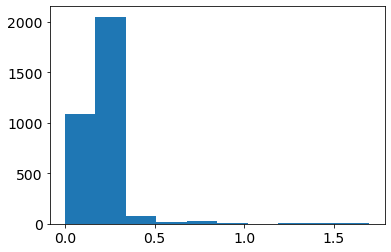

In [5]:
plt.hist(too_selected['Z'])

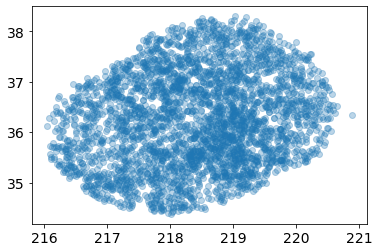

In [6]:
too_selected
plt.scatter(too_selected['TARGET_RA'], too_selected['TARGET_DEC'], alpha=0.3)

In [7]:
too_selected.write('too_20210708.fits', overwrite=True)